# Downloading the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve ,confusion_matrix

1 - Dataset was downloaded from : https://datahub.io/machine-learning/covertype

In [2]:
# Loading the covertype dataset
data = pd.read_csv('covertype_csv.csv') # as dataFrame 

In [3]:
#show data head 
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


2 - 

Data Set Information:

The actual forest cover type for a given observation was determined from US Forest Service Region 2 Resource Information System data.
This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.
These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
Some background information for these four wilderness areas: Neota probably has the highest mean elevational value of the 4 wilderness areas.
The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

-------------------------------------------------------------------------------------------------------------------------------
Attribute Information:

Name / Data Type / Measurement / Description Elevation / quantitative /meters / Elevation in meters Aspect / quantitative / azimuth / Aspect in degrees azimuth Slope / quantitative / degrees / Slope in degrees Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

# Data Exploration

In [4]:
# 3 - number of instances.
data.shape[0]

581012

In [5]:
# 4 - number of attributes.
data.shape[1]

55

In [6]:
# 5 - Number of classes.
len(data['class'].unique())

7

6 - Code of class label with name of class

- 1 >> Spruce/Fir
- 2 >> Lodgepole Pine
- 3 >> Ponderosa Pine
- 4 >> Cottonwood/Willow
- 5 >> Aspen
- 6 >> Douglas-fir
- 7 >> Krummholz

C:\Users\decim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

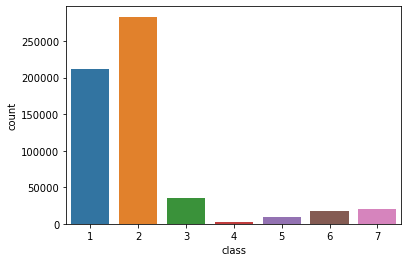

In [7]:
# 7 - Class Distribution.
sns.countplot(data['class'])

In [8]:
# 8 - Statistical summary
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Data Pre-processing

In [9]:
# 9 - Checking for any data quality issues .
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


there is no data quality issues so we keep going.

In [10]:
# 10 - Converting Multiclass classification to binary classification
data['class'] = data['class'].apply(lambda x: 1 if x==2 else 0)
len(data['class'].unique())

2

In [11]:
# 11 - Use a features selection technique to select  that contribute most to the prediction. 
# Create correlation matrix
corr_matrix = data.drop('class', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [12]:
# 12 - Divide your dataset into training, validation and testing datasets.
# 60% - train set, 20% - validation set, 20% - test set
train, valid, test = np.split(data.sample(frac=1,random_state=42), [int(.6*len(data)), int(.8*len(data))])

X_train = train.drop('class', axis=1)
y_train = train['class'].values

X_val = valid.drop('class', axis=1)
y_val = valid['class'].values

X_test = test.drop('class', axis=1)
y_test = test['class'].values

# Classification

In [13]:
# 13.1 - Decision tree classifier.
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# 13.2 - Nearest Neighbor Classifier.
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
# 13.3 - Random Forest.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation

15 - 

Decision tree classifier.

In [16]:
# Confusion Matrix and Classification Report on Validation set
preds = dt.predict(X_val)
print(confusion_matrix(y_val, preds))
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

[[55971  3451]
 [ 3329 53451]]
Error Rate % : 0.058346672174317105
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     59422
           1       0.94      0.94      0.94     56780

    accuracy                           0.94    116202
   macro avg       0.94      0.94      0.94    116202
weighted avg       0.94      0.94      0.94    116202



In [17]:
# Confusion Matrix and Classification Report on Test set
preds = dt.predict(X_test)
print( confusion_matrix(y_test, preds))
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

[[56383  3381]
 [ 3220 53219]]
Error Rate % : 0.056805762329716125
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     59764
           1       0.94      0.94      0.94     56439

    accuracy                           0.94    116203
   macro avg       0.94      0.94      0.94    116203
weighted avg       0.94      0.94      0.94    116203



Nearest Neighbor Classifier.

In [18]:
# Confusion Matrix and Classification Report on Validation set
preds = knc.predict(X_val)
print( confusion_matrix(y_val, preds))
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

[[57879  1543]
 [ 5495 51285]]
Error Rate % : 0.060566943770331005
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     59422
           1       0.97      0.90      0.94     56780

    accuracy                           0.94    116202
   macro avg       0.94      0.94      0.94    116202
weighted avg       0.94      0.94      0.94    116202



In [19]:
# Confusion Matrix and Classification Report on Test set
preds = knc.predict(X_test)
print( confusion_matrix(y_test, preds))
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds)) 

[[58173  1591]
 [ 5308 51131]]
Error Rate % : 0.05937024001101521
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     59764
           1       0.97      0.91      0.94     56439

    accuracy                           0.94    116203
   macro avg       0.94      0.94      0.94    116203
weighted avg       0.94      0.94      0.94    116203



Random Forest.

In [20]:
# Confusion Matrix and Classification Report on Validation set
preds = rf.predict(X_val)
print( confusion_matrix(y_val, preds))
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

[[56445  2977]
 [ 1842 54938]]
Error Rate % : 0.04147088690383982
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     59422
           1       0.95      0.97      0.96     56780

    accuracy                           0.96    116202
   macro avg       0.96      0.96      0.96    116202
weighted avg       0.96      0.96      0.96    116202



In [21]:
# Confusion Matrix and Classification Report on Test set
preds = rf.predict(X_test)
print( confusion_matrix(y_test, preds))
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

[[56728  3036]
 [ 1809 54630]]
Error Rate % : 0.04169427639561807
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     59764
           1       0.95      0.97      0.96     56439

    accuracy                           0.96    116203
   macro avg       0.96      0.96      0.96    116203
weighted avg       0.96      0.96      0.96    116203



16 - Comparision of Classification models

In [22]:
# Storing the predicted probabilities
dt_proba = dt.predict_proba(X_test)[:, 1]
knc_proba = knc.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, dt_proba, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knc_proba, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

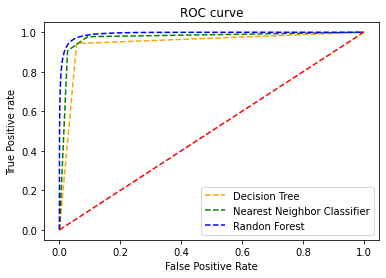

In [23]:
# plotting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Nearest Neighbor Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Randon Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();